#Pre-Processing, Data Visualization, EDA  


1.   Exploring the given Data files, classes and images of different classes.
2.   Dealing with missing values
3.   Visualization of different classes
4.   Analysis from the visualization of different classes. 

Import all the necessary libraries for pre-processing Pandas - for data structures & data analysis,Numpy for computing with array objects,scikit-learn for pre-preocessing & prediction,matplotlib for plotting tool library,seaborn for data visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

Load & read the dataset

In [0]:
# importing required modules 
from zipfile import ZipFile

In [0]:
# specifying the zip file name 
capstone_project = "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip"

In [0]:
# opening the zip file in READ mode 
with ZipFile(capstone_project, 'r') as zip: 
    # extracting all the files 
    zip.extractall()
   

In [18]:
pd.read_csv('/content/stage_2_detailed_class_info.csv')

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


No Lung Opacity/ Not Normal: No Pneumonia but some abnormality observed,
Normal: No Pneumonia observed
,Lung Opacity: Pneumonia observed

In [0]:
df_class_info=pd.read_csv('/content/stage_2_detailed_class_info.csv')

In [21]:
df_class_info.head(5)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [28]:
df_class_info['patientId'].value_counts()

32408669-c137-4e8d-bd62-fe8345b40e73    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
                                       ..
5b46fd5b-d02a-4365-836e-cda3f45eb12c    1
ff38a1fd-53c4-4c3c-93e2-860f025f90de    1
61748ddb-0aa2-486b-9d35-e778e8d01795    1
9a4213ba-f410-46a1-87f0-56e0d4b9e767    1
3b547956-1d00-47b0-8dbb-fe0c40bf6bbf    1
Name: patientId, Length: 26684, dtype: int64

Patient ID gives the unique identies to different classes of pneumonia in the present data set - No Lung Opacity / Not Normal,Lung Opacity,Normal


In [0]:
df_train_labels=pd.read_csv('/content/stage_2_train_labels.csv')

In [32]:
df_train_labels.shape


(30227, 6)

In [23]:
df_train_labels.head(5)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


Dataset has impressions of NaN present in few columns as Missing values which would need to be handled for model building & tuning 
understanding from the data set is as below:

Target 0 : No Pneumonia
Target 1 : Pneumonia
All rows with columns X to width (L-R) have NaN which means patients with NaN, they dont have pneumonia while the ones with the value 1 or more than 1 are the areas of pneumonia detected.

To check for missing values

In [33]:
df_train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [0]:
df_train_labels["x"].fillna("mean()", inplace = True) 
df_train_labels["y"].fillna("mean()", inplace = True)
df_train_labels["width"].fillna("mean()", inplace = True)
df_train_labels["height"].fillna("mean()", inplace = True)

In [41]:
df_train_labels.isnull().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

In [42]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,mean(),mean(),mean(),mean(),0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,mean(),mean(),mean(),mean(),0
2,00322d4d-1c29-4943-afc9-b6754be640eb,mean(),mean(),mean(),mean(),0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,mean(),mean(),mean(),mean(),0
4,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1


# To count the instances of each class in the data to check if data is skewed towards a class

In [43]:
df_train_labels.groupby(["Target"]).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,20672,20672,20672,20672
1,9555,9555,9555,9555,9555


Target 0 : No Pneumonia Target 1 : Pneumonia/abnormal syptoms


In [44]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   x          30227 non-null  object
 2   y          30227 non-null  object
 3   width      30227 non-null  object
 4   height     30227 non-null  object
 5   Target     30227 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


# descriptive statistics of each of the attributes

In [45]:
df_train_labels.describe(include='all')

,patientId,x,y,width,height,Target
count,30227,30227,30227,30227,30227,30227.000000
unique,26684,749,727,352,726,NaN
top,32408669-c137-4e8d-bd62-fe8345b40e73,mean(),mean(),mean(),mean(),NaN
freq,4,20672,20672,20672,20672,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.316108
std,NaN,NaN,NaN,NaN,NaN,0.464963
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000


In [46]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [0]:
for feature in df_train_labels.columns: # Loop through all columns in the dataframe
    if df_train_labels[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_train_labels[feature] = pd.Categorical(df_train_labels[feature]).codes # Replace strings with an integer

In [48]:
df_train_labels.groupby("Target").count()

,patientId,x,y,width,height
Target,,,,,
0,20672,20672,20672,20672,20672
1,9555,9555,9555,9555,9555


In [49]:
df_train_labels[df_train_labels['Target'] == 1]

,patientId,x,y,width,height,Target
4,16,242,120,155,328,1
5,16,519,120,198,402,1
8,24,301,545,102,53,1
9,24,652,543,104,86,1
14,34,266,290,36,84,1
...,...,...,...,...,...,...
30220,19460,294,472,121,222,1
30221,19461,566,432,182,233,1
30222,19461,163,266,170,328,1
30225,19464,527,361,203,294,1


Pneumonia Identified with Target value as 1

To understand the classes division in terms of number


In [51]:
df_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [52]:
round((df_class_info['class'].value_counts()/len(df_class_info.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

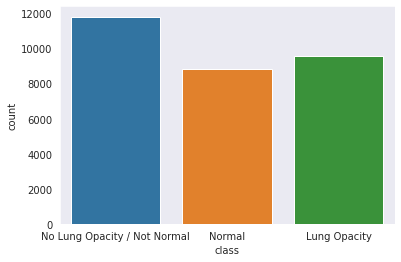

In [54]:
sns.countplot(df_class_info['class'])

In [65]:
sns.pairplot(df_class_info, hue = 'target', diag_kind='kde')    # pairplot
plt.show()

ValueError: ignored

TypeError: ignored

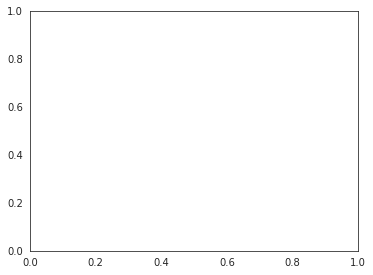

In [64]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_class_info.count, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('class')
plt.show()

In [62]:

sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

ValueError: ignored

In order to work with the Medical images that are stored in a special format called DICOM files - (*Dcm),we would need to install the package to create an understanding of the image type & gives the opportunity to further explore it

In [66]:
pip install pydicom

     |████████████████████████████████| 35.5MB 114kB/s 


In [78]:
import pydicom, glob, pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

patientId = df_class_info['patientId'][1] #No lung opacity/ Not normal
dcm_train = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_med = pydicom.read_file(dcm_train)
print(dcm_med)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory

In [79]:
import os
train_images = os.listdir('/content/stage_2_train_images')
test_images = os.listdir('/content/stage_2_test_images')

print("No. of train images:", len(train_images))
print("No. of test images:", len(test_images))

No. of train images: 26684
No. of test images: 3000


In [0]:
def display_images(data):
    img_data = list(data.T.to_dict().values())
    #img_data = list(data)
    f, ax = plt.subplots(1,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        imageName = data_row['patientId']+'.dcm'
        imagePath = os.path.join("/content/stage_2_train_images",imageName)
        data_row_img = dcm.dcmread(imagePath)
        ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i%3].axis('off')
        ax[i%3].set_title('ID: {}\nClass: {}'.format(
                data_row['patientId'], data_row['class']))
    plt.show()